In [53]:
import tensorflow as tf
from tensorflow import keras

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from sklearn.decomposition import PCA
import re

In [55]:
data = """
The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. 
Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. 
The reproductive number – the number of secondary infections generated from one infected individual – is understood to be between 2 and 2.5 for COVID-19 virus, higher than for influenza. However, estimates for both COVID-19 and influenza viruses are very context and time-specific, making direct comparisons more difficult.  
"""

In [56]:
sentences = data.split(".")

In [57]:
sentences

['\nThe speed of transmission is an important point of difference between the two viruses',
 ' Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus',
 ' The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days',
 ' This means that influenza can spread faster than COVID-19',
 ' \nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza',
 ' In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission',
 ' \nThe reproductive number – the number of secondary infections generated from one infected individual – is

In [58]:
clean_sentences = []
for sentence in sentences:
    if sentence == "":
        continue;
    sentence = re.sub('[^A-Za-z0-9]+',' ',sentence)
    sentence = re.sub(r'(?:^| )\w(?:$| )',' ',sentence).strip()
    sentence = sentence.lower()
    clean_sentences.append(sentence)

In [59]:
clean_sentences

['the speed of transmission is an important point of difference between the two viruses',
 'influenza has shorter median incubation period the time from infection to appearance of symptoms and shorter serial interval the time between successive cases than covid 19 virus',
 'the serial interval for covid 19 virus is estimated to be 6 days while for influenza virus the serial interval is days',
 'this means that influenza can spread faster than covid 19',
 'further transmission in the first 5 days of illness or potentially pre symptomatic transmission transmission of the virus before the appearance of symptoms is major driver of transmission for influenza',
 'in contrast while we are learning that there are people who can shed covid 19 virus 24 48 hours prior to symptom onset at present this does not appear to be major driver of transmission',
 'the reproductive number the number of secondary infections generated from one infected individual is understood to be between and',
 'for covid 

In [60]:
corpus = clean_sentences

In [61]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

In [62]:
print(sequences)

[[1, 33, 2, 3, 9, 34, 35, 36, 2, 37, 12, 1, 38, 20], [4, 39, 21, 40, 41, 42, 1, 13, 22, 43, 10, 23, 2, 24, 11, 21, 14, 15, 1, 13, 12, 44, 45, 16, 5, 6, 7], [1, 14, 15, 8, 5, 6, 7, 9, 46, 10, 17, 47, 18, 25, 8, 4, 7, 1, 14, 15, 9, 18], [26, 48, 27, 4, 28, 49, 50, 16, 5, 6], [51, 3, 29, 1, 52, 53, 18, 2, 54, 55, 56, 57, 58, 3, 3, 2, 1, 7, 59, 1, 23, 2, 24, 9, 30, 31, 2, 3, 8, 4], [29, 60, 25, 61, 19, 62, 27, 63, 19, 64, 65, 28, 66, 5, 6, 7, 67, 68, 69, 70, 10, 71, 72, 73, 74, 26, 75, 76, 77, 10, 17, 30, 31, 2, 3], [1, 78, 32, 1, 32, 2, 79, 80, 81, 22, 82, 83, 84, 9, 85, 10, 17, 12, 11], [8, 5, 6, 7, 86, 16, 8, 4], [87, 88, 8, 89, 5, 6, 11, 4, 20, 19, 90, 91, 11, 13, 92, 93, 94, 95, 96, 97], []]


In [63]:
index_to_word_map = {}
word_to_index_map = {}

for index1,sequence in enumerate(sequences):
    print(sequence)
    word_set = clean_sentences[index1].split()
    print(word_set)
    for index2,value in enumerate(sequence):
        index_to_word_map[value] = word_set[index2]
        word_to_index_map[word_set[index2]] = value

[1, 33, 2, 3, 9, 34, 35, 36, 2, 37, 12, 1, 38, 20]
['the', 'speed', 'of', 'transmission', 'is', 'an', 'important', 'point', 'of', 'difference', 'between', 'the', 'two', 'viruses']
[4, 39, 21, 40, 41, 42, 1, 13, 22, 43, 10, 23, 2, 24, 11, 21, 14, 15, 1, 13, 12, 44, 45, 16, 5, 6, 7]
['influenza', 'has', 'shorter', 'median', 'incubation', 'period', 'the', 'time', 'from', 'infection', 'to', 'appearance', 'of', 'symptoms', 'and', 'shorter', 'serial', 'interval', 'the', 'time', 'between', 'successive', 'cases', 'than', 'covid', '19', 'virus']
[1, 14, 15, 8, 5, 6, 7, 9, 46, 10, 17, 47, 18, 25, 8, 4, 7, 1, 14, 15, 9, 18]
['the', 'serial', 'interval', 'for', 'covid', '19', 'virus', 'is', 'estimated', 'to', 'be', '6', 'days', 'while', 'for', 'influenza', 'virus', 'the', 'serial', 'interval', 'is', 'days']
[26, 48, 27, 4, 28, 49, 50, 16, 5, 6]
['this', 'means', 'that', 'influenza', 'can', 'spread', 'faster', 'than', 'covid', '19']
[51, 3, 29, 1, 52, 53, 18, 2, 54, 55, 56, 57, 58, 3, 3, 2, 1, 7, 5

In [64]:
print(index_to_word_map)
print(word_to_index_map)

{1: 'the', 33: 'speed', 2: 'of', 3: 'transmission', 9: 'is', 34: 'an', 35: 'important', 36: 'point', 37: 'difference', 12: 'between', 38: 'two', 20: 'viruses', 4: 'influenza', 39: 'has', 21: 'shorter', 40: 'median', 41: 'incubation', 42: 'period', 13: 'time', 22: 'from', 43: 'infection', 10: 'to', 23: 'appearance', 24: 'symptoms', 11: 'and', 14: 'serial', 15: 'interval', 44: 'successive', 45: 'cases', 16: 'than', 5: 'covid', 6: '19', 7: 'virus', 8: 'for', 46: 'estimated', 17: 'be', 47: '6', 18: 'days', 25: 'while', 26: 'this', 48: 'means', 27: 'that', 28: 'can', 49: 'spread', 50: 'faster', 51: 'further', 29: 'in', 52: 'first', 53: '5', 54: 'illness', 55: 'or', 56: 'potentially', 57: 'pre', 58: 'symptomatic', 59: 'before', 30: 'major', 31: 'driver', 60: 'contrast', 61: 'we', 19: 'are', 62: 'learning', 63: 'there', 64: 'people', 65: 'who', 66: 'shed', 67: '24', 68: '48', 69: 'hours', 70: 'prior', 71: 'symptom', 72: 'onset', 73: 'at', 74: 'present', 75: 'does', 76: 'not', 77: 'appear', 78

In [65]:
vocab_size = len(tokenizer.word_index) + 1
embeddind_size = 10
window_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(window_size,len(sequence)-window_size):
        context = sequence[i - window_size:i] + sequence[i+1:i+window_size+1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

In [66]:
for i in range(5):
    words = []
    target = index_to_word_map.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word_map.get(j))
    print(words, "=>", target)

['the', 'speed', 'transmission', 'is'] => of
['speed', 'of', 'is', 'an'] => transmission
['of', 'transmission', 'an', 'important'] => is
['transmission', 'is', 'important', 'point'] => an
['is', 'an', 'point', 'of'] => important


In [67]:
X = np.array(contexts)
Y = np.array(targets)

In [68]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embeddind_size,input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x,axis=1)))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(units=vocab_size,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X,Y,epochs=200,verbose=1)

Epoch 1/200
5/5 [==============================] - 1s 4ms/step - loss: 4.5845 - accuracy: 0.0201
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 4.5720 - accuracy: 0.0604
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 4.5532 - accuracy: 0.0537
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 4.5248 - accuracy: 0.0671
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 4.4672 - accuracy: 0.0537
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 4.3827 - accuracy: 0.0537
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 4.2809 - accuracy: 0.0537
Epoch 8/200
5/5 [==============================] - 0s 8ms/step - loss: 4.2056 - accuracy: 0.0537
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 4.1852 - accuracy: 0.0537
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 4.1494 - accuracy: 0.0537
Epoch 11/200
5/5 [===========

5/5 [==============================] - 0s 5ms/step - loss: 0.0784 - accuracy: 1.0000
Epoch 85/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0745 - accuracy: 1.0000
Epoch 86/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0706 - accuracy: 1.0000
Epoch 87/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0698 - accuracy: 1.0000
Epoch 88/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0640 - accuracy: 1.0000
Epoch 89/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 1.0000
Epoch 90/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 1.0000
Epoch 91/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0588 - accuracy: 1.0000
Epoch 92/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 1.0000
Epoch 93/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0513 - accuracy: 1.0000
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 169/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 170/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 171/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 172/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 173/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 174/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 175/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 176/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 177/200
5/5 [=====

In [69]:
# Get the word embeddings
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

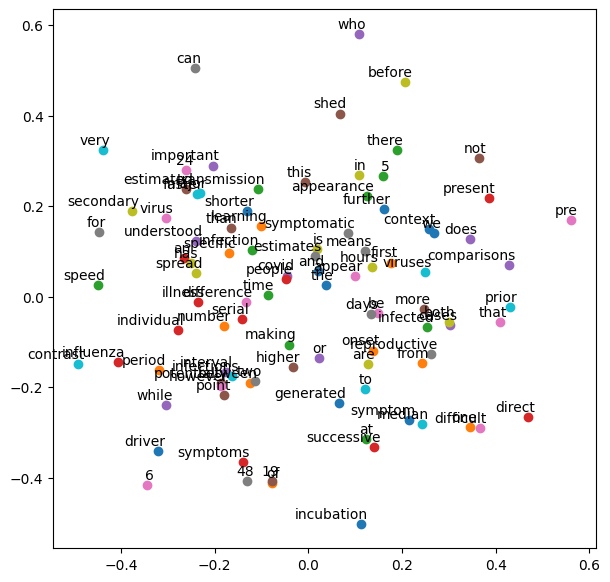

In [70]:
import matplotlib.pyplot as plt
# Visualize the embeddings
plt.figure(figsize=(7, 7))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()

In [71]:
# test model
test_sentenses = [
    "we are to study",
    "create programs direct processes",
    "spirits process study program",
    "idea study people create"
]

In [72]:
for test_sentense in test_sentenses:
    test_words = test_sentense.split(" ")
    print("Words: ", test_words)
    x_test = []
    for i in test_words:
        x_test.append(word_to_index_map.get(i))
    x_test = np.array([x_test])
    print("Indexs: ", x_test)
    test_predictions = model.predict(x_test)
    y_pred = np.argmax(test_predictions[0])
    print("Predictons: ",test_words, " => ", index_to_word_map.get(y_pred))
    print("\n")

Words:  ['we', 'are', 'to', 'study']
Indexs:  [[61 19 10 None]]


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

[[1, 33, 2, 3, 9, 34, 35, 36, 2, 37, 12, 1, 38, 20], [4, 39, 21, 40, 41, 42, 1, 13, 22, 43, 10, 23, 2, 24, 11, 21, 14, 15, 1, 13, 12, 44, 45, 16, 5, 6, 7], [1, 14, 15, 8, 5, 6, 7, 9, 46, 10, 17, 47, 18, 25, 8, 4, 7, 1, 14, 15, 9, 18], [26, 48, 27, 4, 28, 49, 50, 16, 5, 6], [51, 3, 29, 1, 52, 53, 18, 2, 54, 55, 56, 57, 58, 3, 3, 2, 1, 7, 59, 1, 23, 2, 24, 9, 30, 31, 2, 3, 8, 4], [29, 60, 25, 61, 19, 62, 27, 63, 19, 64, 65, 28, 66, 5, 6, 7, 67, 68, 69, 70, 10, 71, 72, 73, 74, 26, 75, 76, 77, 10, 17, 30, 31, 2, 3], [1, 78, 32, 1, 32, 2, 79, 80, 81, 22, 82, 83, 84, 9, 85, 10, 17, 12, 11], [8, 5, 6, 7, 86, 16, 8, 4], [87, 88, 8, 89, 5, 6, 11, 4, 20, 19, 90, 91, 11, 13, 92, 93, 94, 95, 96, 97], []]
{1: 'the', 33: 'speed', 2: 'of', 3: 'transmission', 9: 'is', 34: 'an', 35: 'important', 36: 'point', 37: 'difference', 12: 'between', 38: 'two', 20: 'viruses', 4: 'influenza', 39: 'has', 21: 'shorter', 40: 'median', 41: 'incubation', 42: 'period', 13: 'time', 22: 'from', 43: 'infection', 10: 'to',

5/5 [==============================] - 0s 4ms/step - loss: 0.7292 - accuracy: 0.8859
Epoch 51/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.8993
Epoch 52/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.9329
Epoch 53/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5796 - accuracy: 0.9396
Epoch 54/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.9396
Epoch 55/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5102 - accuracy: 0.9262
Epoch 56/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.9329
Epoch 57/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4432 - accuracy: 0.9396
Epoch 58/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.9597
Epoch 59/200
5/5 [==============================] - 0s 4ms/step - loss: 0.3876 - accuracy: 0.9463
Epoch 60/200
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 134/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 135/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 136/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 137/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 138/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 139/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 140/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 141/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0115 - accuracy: 1.0000
Epoch 142/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 143/200
5/5 [=====

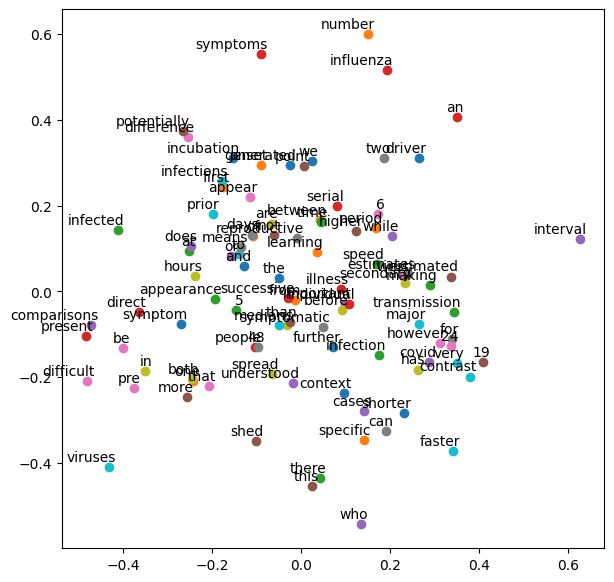

Words:  ['the', 'speed', 'of', 'transmission']
Indices:  [[ 1 33  2  3]]
1/1 [==============================] - 0s 55ms/step
Predictions:  ['the', 'speed', 'of', 'transmission']  =>  symptoms


Words:  ['shorter', 'median', 'incubation', 'period']
Indices:  [[21 40 41 42]]
1/1 [==============================] - 0s 17ms/step
Predictions:  ['shorter', 'median', 'incubation', 'period']  =>  shorter


Words:  ['transmission', 'in', 'the', 'first', '3-5', 'days']
Indices:  [[ 3 29  1 52  0 18]]
1/1 [==============================] - 0s 57ms/step
Predictions:  ['transmission', 'in', 'the', 'first', '3-5', 'days']  =>  to


Words:  ['reproductive', 'number', 'the', 'number', 'of', 'secondary', 'infections']
Indices:  [[78 32  1 32  2 79 80]]
1/1 [==============================] - 0s 19ms/step
Predictions:  ['reproductive', 'number', 'the', 'number', 'of', 'secondary', 'infections']  =>  number




In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from sklearn.decomposition import PCA
import re

data = """
The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. 
Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. 
The reproductive number – the number of secondary infections generated from one infected individual – is understood to be between 2 and 2.5 for COVID-19 virus, higher than for influenza. However, estimates for both COVID-19 and influenza viruses are very context and time-specific, making direct comparisons more difficult.  
"""

sentences = data.split(".")

clean_sentences = []
for sentence in sentences:
    if sentence == "":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    sentence = re.sub(r'(?:^| )\w(?:$| )', ' ', sentence).strip()
    sentence = sentence.lower()
    clean_sentences.append(sentence)

corpus = clean_sentences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

print(sequences)

index_to_word_map = {}
word_to_index_map = {}

for index1, sequence in enumerate(sequences):
    word_set = clean_sentences[index1].split()
    for index2, value in enumerate(sequence):
        index_to_word_map[value] = word_set[index2]
        word_to_index_map[word_set[index2]] = value

print(index_to_word_map)
print(word_to_index_map)

vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

X = np.array(contexts)
Y = np.array(targets)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(units=vocab_size, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=200, verbose=1)

# Get the word embeddings
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

import matplotlib.pyplot as plt
# Visualize the embeddings
plt.figure(figsize=(7, 7))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()

# Updated test model sentences
test_sentences = [
    "the speed of transmission",
    "shorter median incubation period",
    "transmission in the first 3-5 days",
    "reproductive number the number of secondary infections"
]

for test_sentence in test_sentences:
    test_words = test_sentence.split(" ")
    print("Words: ", test_words)
    x_test = [word_to_index_map.get(word, 0) for word in test_words]  # Use 0 if the word is not in the vocabulary
    x_test = np.array([x_test], dtype=np.int32)
    print("Indices: ", x_test)
    test_predictions = model.predict(x_test)
    y_pred = np.argmax(test_predictions[0])
    print("Predictions: ", test_words, " => ", index_to_word_map.get(y_pred))
    print("\n")
